In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from scipy.io import readsav
from pkg_resources import resource_filename
import pprint

import sambuca as sb

# set some controls on numpy formatting
# 5 decimal places, suppress scientific notation
np.set_printoptions(precision=5, suppress=True)

# set the matplotlib style to emulate ggplot2 from R
plt.style.use('ggplot')
plot_width = 9
plot_height = plot_width * 3/4

pp = pprint.PrettyPrinter(indent=4).pprint

In [2]:
%ls ../../sambuca/tests/data

_F1nm_H25_a_Non_UQ02_MB_RC__OS_SHon.sav  qbtest_output_spectra.hdr
noise_error_data.sav                     qbtest_output_spectra.lib
no_noise_error_data.sav                  sensor_filter_test_data.sav
qbtest_filter_350_900nm.hdr              test_error_noise.mat
qbtest_filter_350_900nm.lib              test_error_no_noise.mat
qbtest_input_spectra.hdr                 test_optimise_data.mat
qbtest_input_spectra.lib                 test_resample.mat


In [3]:
def plot_spectra(plot_items):
    plt.figure(figsize=(plot_width, plot_height))
    for pi in plot_items:
        plt.plot(pi[0], label=pi[1])
          
    #plt.legend(loc='upper right')
    plt.show()

In [4]:
filename = resource_filename(
    sb.__name__,
    './tests/data/sensor_filter_test_data.sav')
sf = readsav(filename)
sf.keys()

dict_keys(['input_spectra', 'output_spectra', 'filter'])

In [5]:
filter = sf['filter']
print(filter.shape[0])
filter[4,:].shape

399


(551,)

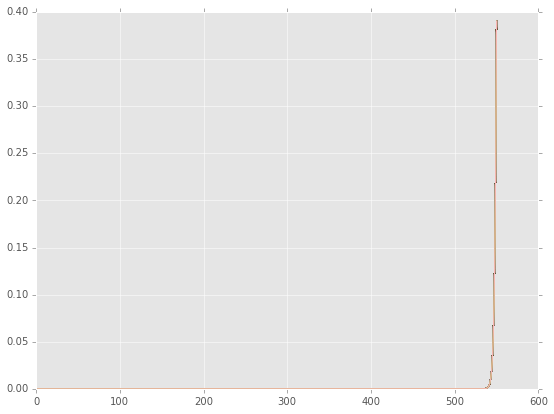

In [6]:
plot_items = []

for band in range(filter.shape[0]):
    plot_items.append((filter[band,:], band))
    
plot_spectra(plot_items)

#Load the main data set

In [7]:
data = readsav('../../sambuca/tests/data/_F1nm_H25_a_Non_UQ02_MB_RC__OS_SHon.sav')

/usr/lib/python3.4/site-packages/scipy/io/idl.py:420: UserWarning: Skipping SYSTEM_VARIABLE record
  warnings.warn("Skipping SYSTEM_VARIABLE record")


In [8]:
data.keys()

dict_keys(['sambuca', 'index1', 'r2', 'index2', 'r1', 'zz', 'z', 'substrater', 'spectra', 'q1'])

In [9]:
data.spectra[0].dtype.names

('WL',
 'SUBSTRATER',
 'INPUT_SPECTRA',
 'A',
 'BB',
 'R0',
 'R0DP',
 'RRS',
 'RRSDP',
 'KD',
 'KUC',
 'KUB')

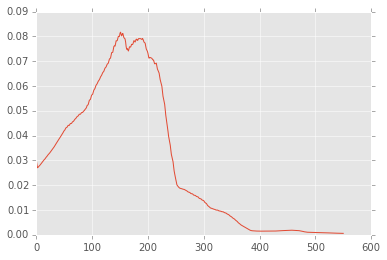

In [10]:
plt.plot(data.spectra[0].R0);

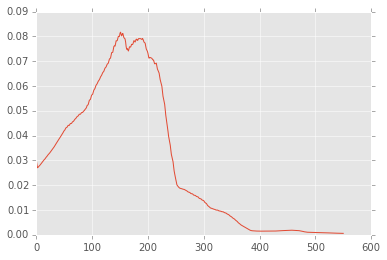

In [11]:
plt.plot(data.spectra[0].R0DP);

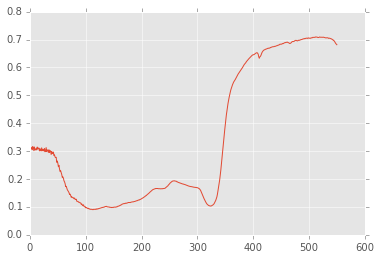

In [12]:
plt.plot(data.spectra[0].substrater);

In [13]:
data.sambuca.dtype.names

('DISTANCES',
 'OPTI_PARAMS',
 'INPUT_PARAMS',
 'IMAGESPECTRA',
 'INPUT_SPECTRA',
 'INPUTR',
 'INPUT_SIOP',
 'WGOSW')

In [14]:
data.sambuca.input_spectra[0].dtype.names

('WL',
 'AWATER',
 'BBWATER',
 'APHY_STAR',
 'ACDOM_STAR',
 'ATR_STAR',
 'BBPH_STAR',
 'BBTR_STAR',
 'CALCULATE_SIOPS',
 'SUBSTRATER')

In [15]:
data.sambuca.input_params[0].dtype.names

('THETA_AIR', 'LAMBDA0CDOM', 'LAMBDA0TR', 'LAMBDA0X')

# Parameters in ZZ

In [16]:
type(data.zz)

numpy.ndarray

In [17]:
len(data.zz)

15

#Substrate Extraction

In [18]:
data.sambuca.inputr[0].dtype.names

('N_SPECTRA', 'SUBS_Z', 'SPECTRA', 'NAMES', 'INDEX')

In [19]:
spectra = data.sambuca.inputr[0].spectra[0]
indicies = data.sambuca.inputr[0].index[0]
substrate1 = spectra[indicies[0]]

In [20]:
data.sambuca.inputr[0].spectra[0][:,0].shape

(551,)

In [21]:
len(data.sambuca.inputr[0].index)

1

#Error data

In [22]:
def print_error_data(ed):
    print("a: {}".format(ed.error_a))
    print("af: {}".format(ed.error_af))
    print("f: {}".format(ed.error_f))
    print("lsq: {}".format(ed.lsq))
    plt.plot(ed.rrs, 'b', label='rrs')
    plt.plot(ed.realrrs, 'g', label='realrrs')
    #plt.plot(ed.noiserrs, 'r', label='noiserrs')
    plt.legend()
    plt.ylim(0, 1.3)
    plt.show()

In [23]:
noise_data = readsav('../../sambuca/tests/data/noise_error_data.sav')
noise_data.keys()

dict_keys(['realrrs', 'rrs', 'lsq', 'error_a', 'error_af', 'noiserrs', 'error_f'])

In [24]:
noise_data.realrrs

array([ 0.00155,  0.00145,  0.00141,  0.00137,  0.00132,  0.00129,
        0.00126,  0.00123,  0.00121,  0.00118,  0.00116,  0.00113,
        0.00112,  0.00112,  0.00111,  0.00111,  0.00111,  0.00111,
        0.00112,  0.00114,  0.00116,  0.00118,  0.00119,  0.00119,
        0.0012 ,  0.0012 ,  0.0012 ,  0.00122,  0.00123,  0.00124,
        0.00125,  0.00126,  0.00128,  0.0013 ,  0.00132,  0.00139,
        0.00145,  0.0015 ,  0.00154,  0.00159,  0.00166,  0.00174,
        0.00179,  0.00183,  0.00188,  0.00198,  0.00207,  0.00215,
        0.00223,  0.00231,  0.00236,  0.00242,  0.00242,  0.00241,
        0.0024 ,  0.0024 ,  0.00239,  0.00241,  0.00243,  0.00245,
        0.00248,  0.00251,  0.00252,  0.00252,  0.00253,  0.00254,
        0.00255,  0.00258,  0.00262,  0.00265,  0.00269,  0.00273,
        0.00277,  0.00281,  0.00285,  0.00294,  0.00302,  0.00307,
        0.00313,  0.00317,  0.00323,  0.00328,  0.00332,  0.00336,
        0.0034 ,  0.0035 ,  0.0036 ,  0.00365,  0.0037 ,  0.00

a: 0.9755970024830055
af: 0.08708689457115347
f: 0.0892652338511777
lsq: 5.897183601134045


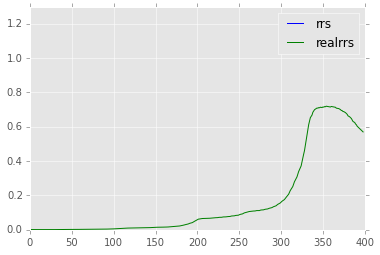

In [25]:
print_error_data(noise_data)

In [26]:
no_noise_data = readsav('../../sambuca/tests/data/no_noise_error_data.sav')
no_noise_data.keys()

dict_keys(['realrrs', 'rrs', 'lsq', 'error_a', 'error_af', 'noiserrs', 'error_f'])

a: 0.9755970024855829
af: 0.08708689457246128
f: 0.0892652338522824
lsq: 5.897183601134045


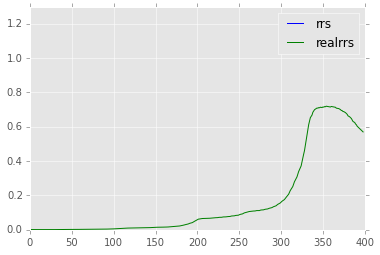

In [27]:
print_error_data(no_noise_data)

In [28]:
realrrs = noise_data.realrrs
rrs = noise_data.rrs
expected_lsq = noise_data.lsq
lsq = np.power(np.sum(np.power(realrrs - rrs, 2)), 0.5)
lsq_np = np.linalg.norm(realrrs - rrs)
print(expected_lsq, lsq, lsq_np)

5.89718360113 5.89718335694 5.89718


In [29]:
f_val = np.power( np.sum( np.power( realrrs - rrs, 2)), 0.5) / np.sum(realrrs)
f_val_np = np.linalg.norm(realrrs - rrs) / np.sum(realrrs)
f_val_3 = lsq_np / realrrs.sum()
print(f_val, f_val_np, f_val_3)

0.0892652352876 0.0892652 0.0892652


In [30]:
observed_rrs = realrrs
modelled_rrs = rrs
botline1 = np.power(np.sum(np.power(observed_rrs, 2)), 0.5)
botline2 = np.power(np.sum(np.power(modelled_rrs, 2)), 0.5)
botline1_np = np.linalg.norm(observed_rrs)
botline2_np = np.linalg.norm(modelled_rrs)

print(botline1, botline1_np)
print(botline2, botline2_np)

5.89882584866 5.89883
0.00293011898102 0.00293012
